# An Introduction to Regression

In this section, you will be introduced to regression. Regression comes in handy when you are trying to predict future variables using historical data. You will learn various regression techniques such as linear regression with single and multiple variables, along with polynomial and Support Vector Regression (SVR). You will use these techniques to predict future stock prices from a stock price data.

## Introduction

In the previous section, you were introduced to the fundamentals of Artificial Intelligence (AI), which helped you create the game Tic-Tac-Toe. In this section, we will be looking at regression, which is a machine learning algorithm that can be used to measure how closely related independent variable(s), called features, relate to a dependent variable called a label.

Linear regression is a concept with many applications a variety of fields, ranging from finance (predicting the price of an asset) to business (predicting the sales of a product) and even the economy (predicting economy growth).

Most of this section will deal with different forms of linear regression, including linear regression with one variable, linear regression with multiple variables, polynomial regression with one variable, and polynomial regression with multiple variables. Python provides lots of forms of support for performing regression operations and we will also be looking at these later on.

We will also use an alternative regression model, called **Support Vector Regression (SVR)**, with different forms of linear regression. Throughout this chapter, we will be using a few sample datasets along with the stock price data loaded from the `Quandl` Python library to predict future prices using different types of regression.

---

# Linear Regression with One Variable

A general regression problem can be defined with the following example. Suppose we have a set of data points and we need to figure out the best fit curve to approximately fit the given data points. This curve will describe the relationship between our input variable, $x$, which is the data point, and the output variable, $y$, which is the curve.

Remember, in real life, we often have more than one input variable determining the output variable. However, linear regression with one variable will help us to understand how the input variable impacts the output variable.

## Types of Regression

In this chapter, we will work with regression on the two-dimensional plane. This means that our data points are two-dimensional, and we are looking for a curve to approximate how to calculate one variable from another.

We will come across the following types of regression in this chapter:

  * **Linear regression with one variable using a polynomial of degree 1**: This is the most basic form of regression, where a straight line approximates the trajectory of future data.
  * **Linear regression with multiple variables using a polynomial of degree 1**: We will be using equations of degree 1, but we will also allow multiple input variables, called features.
  * **Polynomial regression with one variable**: This is a generic form of the linear regression of one variable. As the polynomial used to approximate the relationship between the input and the output is of an arbitrary degree, we can create curves that fit the data points better than a straight line. The regression is still linear – not because the polynomial is linear, but because the regression problem can be modeled using linear algebra.
  * **Polynomial regression with multiple variables**: This is the most generic regression problem, using higher degree polynomials and multiple features to predict the future.
  * **SVR**: This form of regression uses Support Vector Machines (SVMs) to predict data points. This type of regression is included to explain SVR's usage compared to the other four regression types.
  
Now we will deal with the first type of linear regression: we will use one variable, and the polynomial of the regression will describe a straight line.

On the two-dimensional plane, we will use the Déscartes coordinate system, more commonly known as the Cartesian coordinate system. We have an x and a y-axis, and the intersection of these two axes is the origin. We denote points by their x and y coordinates.

For instance, point $(2, 1)$ corresponds to the black point on the following coordinate system:

![Figure 2.1](img/fig2_01.jpg)

A straight line can be described with the equation $y = a*x + b$, where a is the slope of the equation, determining how steeply the equation climbs up, and b is a constant determining where the line intersects the y-axis.

In Figure 2.2, you can see three equations:

  * The straight line is described with the equation $y = 2*x + 1$.
  * The dashed line is described with the equation $y = x + 1$.
  * The dotted line is described with the equation $y = 0.5*x + 1$.
  
You can see that all three equations intersect the y-axis at 1, and their slope is determined by the factor by which we multiply x.

If you know x, you can solve y. Similarly, if you know y, you can solve x. This equation is a polynomial equation of degree 1, which is the base of linear regression with one variable:

![Figure 2.2](img/fig2_02.jpg)

We can describe curves instead of straight lines using polynomial equations; for example, the polynomial equation $4x4-3x3-x2-3x+3$ will result in Figure 2.3. This type of equation is the base of polynomial regression with one variable:

![Figure 2.3](img/fig2_03.jpg)

  > **Note**  
  > If you would like to experiment further with the Cartesian coordinate system, you can use the following plotter: [https://s3-us-west-2.amazonaws.com/oerfiles/College+Algebra/calculator.html](https://s3-us-west-2.amazonaws.com/oerfiles/College+Algebra/calculator.html).

## Features and Labels

In machine learning, we differentiate between features and labels. Features are considered our **input** variables, and labels are our **output** variables.

When talking about regression, the possible value of the labels is a continuous set of rational numbers. Think of features as the values on the x-axis and labels as the values on the y-axis.

The task of regression is to predict label values based on feature values.

We often create a label by projecting the values of a feature in the future.

For instance, if we would like to predict the price of a stock for next month using historical monthly data, we would create the label by shifting the stock price feature one month into the future:

  * For each stock price feature, the label would be the stock price feature of the next month.
  * For the last month, prediction data would not be available, so these values are all `NaN` (Not a Number).
  
Let's say we have data for the months of `January`, `February`, and `March`, and we want to predict the price for `April`. Our feature for each month will be the current monthly price and the label will be the price of the next month.

For instance, take a look at the following table:

![Figure 2.4](img/fig2_04.jpg)

This means that the label for `January` is the price of `February` and that the label for `February` is actually the price of `March`. The label for March is unknown (`NaN`) as this is the value we are trying to predict.

## Feature Scaling

At times, we have multiple features (inputs) that may have values within completely different ranges. Imagine comparing micrometers on a map to kilometers in the real world. They won't be easy to handle because of the difference in magnitude of nine zeros.

A less dramatic difference is the difference between imperial and metric data. For instance, pounds and kilograms, and centimeters and inches, do not compare that well.

Therefore, we often scale our features to normalized values that are easier to handle, as we can compare the values of these ranges more easily.

We will demonstrate two types of scaling:

  * Min-max normalization
  * Mean normalization
  
$$
x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

Here, $X_{min}$ is the minimum value of the feature and $X_{max}$ is the maximum value.

The feature-scaled values will be within the range of $[0;1]$.

Mean normalization is calculated as follows:

$$
x_{scaled} = \frac{x - AVG}{x_{MAX} - X_{MIN}}
$$

Here, $AVG$ is the average.

The feature-scaled values will be within the range of $[-1;1]$.

Here's an example of both normalizations applied on the first 13 numbers of the Fibonacci sequence.

We begin with finding the min-max normalization:

In [1]:
fibonacci = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34,55, 89, 144]

# Min-Max normalization
[(float(i) - min(fibonacci)) / (max(fibonacci) - min(fibonacci)) for i in fibonacci]

[0.0,
 0.006944444444444444,
 0.006944444444444444,
 0.013888888888888888,
 0.020833333333333332,
 0.034722222222222224,
 0.05555555555555555,
 0.09027777777777778,
 0.14583333333333334,
 0.2361111111111111,
 0.3819444444444444,
 0.6180555555555556,
 1.0]

Now, take a look at the following code snippet to find the mean normalization:

In [2]:
# Mean normalization
avg = sum(fibonacci) / len(fibonacci)
print("Average: ", avg)

[(float(i)-avg) / (max(fibonacci) - min(fibonacci)) for i in fibonacci]

Average:  28.923076923076923


[-0.20085470085470086,
 -0.19391025641025642,
 -0.19391025641025642,
 -0.18696581196581197,
 -0.18002136752136752,
 -0.16613247863247863,
 -0.1452991452991453,
 -0.11057692307692307,
 -0.05502136752136752,
 0.035256410256410256,
 0.18108974358974358,
 0.4172008547008547,
 0.7991452991452992]

  > **Note**  
  > Scaling could add to the processing time, but, often, it is an important step to add.
  
In the scikit-learn library, we have access to the `preprocessing.scale` function, which scales NumPy arrays:

In [21]:
import numpy as np
from sklearn import preprocessing

scaled_fibonacci = preprocessing.scale(fibonacci)
print(scaled_fibonacci)

[-0.6925069  -0.66856384 -0.66856384 -0.64462079 -0.62067773 -0.57279161
 -0.50096244 -0.38124715 -0.18970269  0.12155706  0.62436127  1.43842524
  2.75529341]


The `scale` method performs a standardization, which is another type of normalization. Notice that the result is a NumPy array.

---

## Splitting Data into Training and Testing

Now that we have learned how to normalize our dataset, we need to learn about the training-testing split. In order to measure how well our model can generalize its predictive performance, we need to split our dataset into a training set and a testing set. The training set is used by the model to learn from so that it can build predictions. Then, the model will use the testing set to evaluate the performance of its prediction.

When we split the dataset, we first need to shuffle it to ensure that our testing set will be a generic representation of our dataset. The split is usually 90% for the training set and 10% for the testing set.

With training and testing, we can measure whether our model is overfitting or underfitting.

**Overfitting** occurs when the trained model fits the training dataset too well. The model will be very accurate on the training data, but it will not be usable in real life, as its accuracy will decrease when used on any other data. The model adjusts to the random noise in the training data and assumes patterns on this noise that yield false predictions.

**Underfitting** occurs when the trained model does not fit the training data well enough to recognize important patterns in the data. As a result, it cannot make accurate predictions on new data. One example of this is when we attempt to do linear regression on a dataset that is not linear. For example, the Fibonacci sequence is not linear; therefore, a model on a Fibonacci-like sequence cannot be linear either.

We can do the training-testing split using the `model_selection` library of scikit-learn.

Suppose, in our example, that we have scaled the Fibonacci data and defined its indices as labels:

In [4]:
features = preprocessing.scale(fibonacci)
label = np.array(range(13))

Now, let's use $10\%$ of the data as test data, `test_size=0.1`, and specify `random_state` parameter in order to get the exact same split every time we run the code:

In [5]:
from sklearn import model_selection

(x_train, x_test, y_train, y_test) = model_selection.train_test_split(features, label, test_size=0.1, random_state=8)

Our dataset has been split into test and training sets for our features (`x_train` and `x_test`) and for our labels (`y_train` and `y_test`).

Finally, let's check each set, beginning with the `x_train` feature:

In [6]:
x_train

array([ 1.43842524, -0.18970269, -0.50096244,  2.75529341, -0.6925069 ,
       -0.66856384, -0.57279161,  0.12155706, -0.66856384, -0.62067773,
       -0.64462079])

Next, we check for `x_test`:

In [7]:
x_test

array([-0.38124715,  0.62436127])

Then, we check for `y_train`:

In [8]:
y_train

array([11,  8,  6, 12,  0,  2,  5,  9,  1,  4,  3])

Next, we check for `y_test`:

In [9]:
y_test

array([ 7, 10])

In the preceding output, we can see that our split has been properly executed; for instance, our label has been split into `y_test`, which contains the $7$ and $10$ indexes, and `y_train` which contains the remaining 11 indexes. The same logic has been applied to our features and we have 2 values in `x_test` and 11 values in `x_train`.

---

## Fitting a Model on Data with scikit-learn

We are now going to illustrate the process of regression on an example where we only have one feature and minimal data.

As we only have one feature, we have to format `x_train` by reshaping it with `x_train.reshape (-1,1)` to a NumPy array containing one feature.

Therefore, before executing the code on fitting the best line, execute the following code:

In [10]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

We can fit a linear regression model on our data with the following code:

In [11]:
from sklearn import linear_model

linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(x_train, y_train)
model.predict(x_test)

array([4.46396931, 7.49212796])

We can also calculate the score associated with the model:

In [12]:
model.score(x_test, y_test)

-1.8268608450379085

This score represents the accuracy of the model and is defined as the R2 or **coefficient of determination**. It represents how well we can predict the features from the labels.

In our example, an $R^2$ of $-1.8268$ indicates a very bad model as the best possible score is 1. A score of 0 can be achieved if we constantly predict the labels by using the average value of the features.

Our model does not perform well for two reasons:

  * If we check our previous Fibonacci sequence, 11 training data points and 2 testing data points are simply not enough to perform a proper predictive analysis.
  * Even if we ignore the number of points, the Fibonacci sequence does not describe a linear relationship between x and y. Approximating a nonlinear function with a line is only useful if we are looking at two very close data points.
  
---

## Linear Regression Using NumPy Arrays

One reason why NumPy arrays are handier than Python lists is that they can be treated as vectors. There are a few operations defined on vectors that can simplify our calculations. We can perform operations on vectors of similar lengths.

Let's take, for example, two vectors, $V_1$ and $V_2$, with three coordinates each:

  * $V_1 = (a, b, c)$ with $a=1$, $b=2$, and $c=3$
  * $ V_2 = (d, e, f)$ with $d=2$, $e=0$, and $f=2$

The addition of these two vectors will be this:

$$
V_1 + V_2 = (a+d, b+e, c+f) = (1+2, 2+0, 3+2) = (3,2,5)
$$

The product of these two vectors will be this:

$$
V_1 + V_2 = (a*d, b*e, c*f) = (1*2, 2*0, 3*2) = (2,0,6)
$$

You can think of each vector as our datasets with, for example, the first vector as our **features set** and the second vector as our **labels set**. With Python being able to do vector calculations, this will greatly simplify the calculations required for our linear regression models.

Now, let's build a linear regression using NumPy in the following example.

Suppose we have two sets of data with 13 data points each; we want to build a linear regression that best fits all the data points for each set.

Our first set is defined as follows:

In [14]:
V1 = [2, 8, 8, 18, 25, 21, 32, 44, 32, 48, 61, 45, 62]
V2 = list(range(1, 14))

print(V1)
print(V2)

[2, 8, 8, 18, 25, 21, 32, 44, 32, 48, 61, 45, 62]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


If we plot this dataset with the values `V1` as the y-axis, and the index of each value `V2` as the x-axis, we will get the following plot:

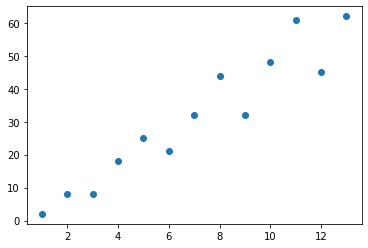

In [19]:
import matplotlib.pyplot as plt

plt.scatter(V2, V1)

We can see that this dataset's distribution seems linear in nature, and if we wanted to draw a line that was as close as possible to each dot, it wouldn't be too hard. A simple linear regression appears appropriate in this case.

Our second set is the first 13 values scaled in the Fibonacci sequence that we saw earlier in the Feature Scaling section:

In [23]:
print(scaled_fibonacci)

[-0.6925069  -0.66856384 -0.66856384 -0.64462079 -0.62067773 -0.57279161
 -0.50096244 -0.38124715 -0.18970269  0.12155706  0.62436127  1.43842524
  2.75529341]


If we plot this dataset with the values as the y-axis and the index of each value as the x-axis, we will get the following plot:

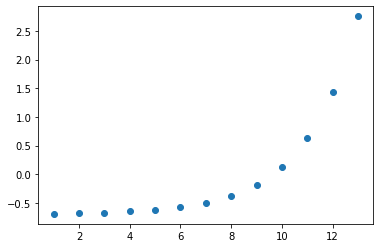

In [24]:
plt.scatter(V2, scaled_fibonacci)

We can see that this dataset's distribution doesn't appear to be linear, and if we wanted to draw a line that was as close as possible to each dot, our line would miss quite a lot of dots. A simple linear regression will probably struggle in this situation.

We know that the equation of a straight line is $y = a * x + b$.

In this equation, $a$ is the slope, and $b$ is the y intercept. To find the line of best fit, we must find the coefficients of $a$ and $b$.

In order to do this, we will use the least-squares method, which can be achieved by completing the following steps:

  1. For each data point calculate $x^2$ and $x * y$. Sum all of $x, y, x^2$ and $x * y$, which gives us $\sum{X}$, $\sum{y}$, $\sum{X^2}$ and $\sum{Xy}$ ($\sum{X}$ means "sum up") 
  2. Calculate the slope, $a$ as
    $$
    a = \frac{N \sum{xy} - \sum{x} \sum{y}}{N \sum{X^2} - (\sum{X})^2}
    $$
    with $N$ as the total number of data points.
  3. Calculate the $y$ intercept, $b$ as
    $$
    b = \frac{\sum{y} - a \sum{x}}{N}
    $$

Now, let's apply these steps using NumPy as an example for the first dataset in the following code.

Let's take a look at the first step:

In [25]:
import numpy as np

x = np.array(range(1, 14))
y = np.array([2, 8, 8, 18, 25, 21, 32, 44, 32, 48, 61, 45, 62])
x_2 = x**2
xy = x*y

For `x_2`, the output will be this:

In [27]:
x_2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169])

For `xy`, the output will be this:

In [28]:
xy

array([  2,  16,  24,  72, 125, 126, 224, 352, 288, 480, 671, 540, 806])

Now, let's move on to the next step:

In [29]:
sum_x = sum(x)
sum_y = sum(y)
sum_x_2 = sum(x_2)
sum_xy = sum(xy)

Let's see the outputs: 

In [31]:
print('sum_x: ', sum_x)
print('sum_y: ', sum_y)
print('sum_x_2: ', sum_x_2)
print('sum_xy: ', sum_xy)

sum_x:  91
sum_y:  406
sum_x_2:  819
sum_xy:  3726


Now, let's move on to the next step:

In [32]:
N = len(x)
print('N: ', N)
a = (N * sum_xy - (sum_x * sum_y)) / (N * sum_x_2 - (sum_x) ** 2)
print('a: ', a)

N:  13
a:  4.857142857142857


Now, let's move on to the final step:

Now, let's move on to the final step:

In [33]:
b = (sum_y - a * sum_x) / N
print('b: ', b)

b:  -2.7692307692307647


Once we plot the line $y = a * x + b$ with the preceding coefficients, we get the following graph:

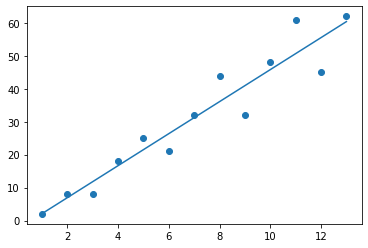

In [38]:
y_prim = [a * x + b for x in x]

plt.plot(x, y_prim)
plt.scatter(x, y)

plt.show()

As you can see, our linear regression model works quite well on this dataset, which has a linear distribution.

  > **Note**  
  > You can find a linear regression calculator at [http://www.endmemo.com/statistics/lr.php](http://www.endmemo.com/statistics/lr.php). You can also check the calculator to get an idea of what lines of best fit look like on a given dataset.
  
We will now repeat the exact same steps for the second dataset:

In [41]:
x = np.array(range(1, 14))
y = np.asarray(scaled_fibonacci)

x_2 = x**2
xy = x*y
sum_x = sum(x)
sum_y = sum(y)
sum_x_2 = sum(x_2)
sum_xy = sum(xy)
N = len(x)
a = (N * sum_xy - (sum_x * sum_y)) / (N * sum_x_2 - (sum_x) ** 2)
b = (sum_y - a * sum_x) / N

print("a: ", a)
print("b: ", b)

a:  0.21838173535982802
b:  -1.528672147518796


Once we plot the line $y = a * x + b$ with the preceding coefficients, we get the following graph:

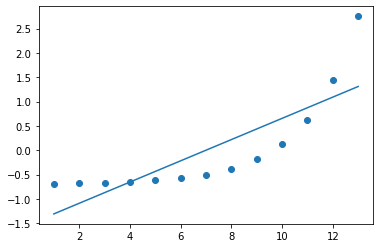

In [42]:
y_prim = [a * i + b for i in x]

plt.scatter(x, y)
plt.plot(x, y_prim)

plt.show()

Clearly, with a nonlinear distribution, our linear regression model struggles to fit the data.

---

## Fitting a Model Using NumPy Polyfit

NumPy Polyfit can also be used to create a line of best fit for linear regression with one variable.

The equation for finding the coefficients 15 and 16 is quite long. Fortunately, `numpy.polyfit` in Python performs these calculations to find the coefficients of the line of best fit. The `polyfit` function accepts three arguments: the array of `x` values, the array of `y` values, and the degree of polynomial to look for. As we are looking for a straight line, the highest power of `x` is $1$ in the polynomial:

In [43]:
import numpy as np

x = np.array(range(1, 14))
y = np.array([2, 8, 8, 18, 25, 21, 32, 44, 32, 48, 61, 45, 62])
[a, b] = np.polyfit(x, y, 1)

print("a: ", a)
print("b: ", b)

a:  4.857142857142857
b:  -2.769230769230768


### Plotting the Results in Python

Suppose you have a set of data points and a regression line; our task is to plot the points and the line together so that we can see the results with our eyes.

We will use the `matplotlib.pyplot` library for this. This library has two important functions:

  * `scatter`: This displays scattered points on the plane, defined by a list of $x$ coordinates and a list of $y$ coordinates.
  * `plot`: Along with two arguments, this function plots a segment defined by two points or a sequence of segments defined by multiple points. A plot is like a scatter, except that instead of displaying the points, they are connected by lines.
  
A plot with three arguments plots a segment and/or two points formatted according to the third argument.

A segment is defined by two points. As x ranges between 1 and 13 (remember the dataset contains 13 data points), it makes sense to display a segment between 0 and 15. We must substitute the value of x in the equation $a * x + b$ to get the corresponding y values:

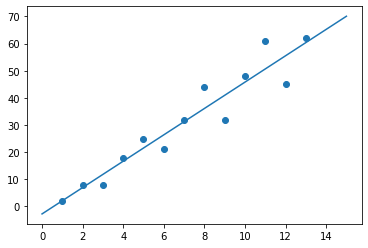

In [44]:
# import numpy as np
# import matplotlib.pyplot as plt


x = np.array(range(1, 14))
y = np.asarray([2, 8, 8, 18, 25, 21, 32, 44, 32, 48, 61, 45, 62])

x_2 = x**2
xy = x*y
sum_x = sum(x)
sum_y = sum(y)
sum_x_2 = sum(x_2)
sum_xy = sum(xy)
N = len(x)
a = (N * sum_xy - (sum_x * sum_y)) / (N * sum_x_2 - (sum_x) ** 2)
b = (sum_y - a * sum_x) / N


# Plotting the points
plt.scatter(x, y)

# Plotting the line
plt.plot([0, 15], [b, 15 * a+b])
plt.show()

The regression line and the scattered data points are displayed as expected.

However, the plot has an advanced signature. You can use `plot` to draw scattered dots, lines, and any curves on this figure. These variables are interpreted in groups of three:

  * `x` values
  * `y` values
  * Formatting options in the form of a string
  
Let's create a function for deriving an array of approximated `y` values from an array of approximated `x` values:

In [45]:
def fitY(arr):
    return [4.857142857142857 * x - 2.769230769230768 for x in arr]

We will use the `fitY` function to plot the values:

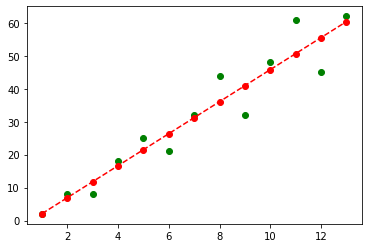

In [47]:
plt.plot(x, y, 'go', x, fitY(x), 'r--o')
plt.show()

Every third argument handles formatting. The letter `g` stands for green, while the letter `r` stands for red. You could have used `b` for blue and `y` for yellow, among other examples. In the absence of a color, each triple value will be displayed using a different color. The `o` character symbolizes that we want to display a dot where each data point lies. Therefore, `go` has nothing to do with movement – it requests the plotter to plot green dots. The `-` characters are responsible for displaying a dashed line. If you just use -1, a straight line appears instead of the dashed line.

The Python plotter library offers a simple solution for most of your graphing problems. You can draw as many lines, dots, and curves as you want on this graph.

There is a large variety of ways to plot curves. We have seen that the `polyfit` method of the NumPy library returns an array of coefficients to describe a linear equation:

In [48]:
# import numpy as np

x = np.array(range(1, 14))
y = np.array([2, 8, 8, 18, 25, 21, 32, 44, 32, 48, 61, 45, 62])
np.polyfit(x, y, 1)

array([ 4.85714286, -2.76923077])

This array describes the equation $4.85714286 * x - 2.76923077$.

Suppose we now want to plot a curve, $y = -x^2 + 3x - 2$. This quadratic equation is described by the coefficient array $[-1, 3, -2]$ as $y = (-1) * x^2 + (3) * x - 2$. We could write our own function to calculate the $y$ values belonging to $x$ values. However, the NumPy library already has a feature that can do this work for us – `np.poly1d`:

In [49]:
# import numpy as np

x = np.array(range(-10, 10, 1))
f = np.poly1d([-1, 3, -2])

The `f` function that's created by the `poly1d` call not only works with single values but also with lists or NumPy arrays:

In [51]:
print(f(5))
print(f(x))

-12
[-132 -110  -90  -72  -56  -42  -30  -20  -12   -6   -2    0    0   -2
   -6  -12  -20  -30  -42  -56]


We can now use these values to plot a nonlinear curve:

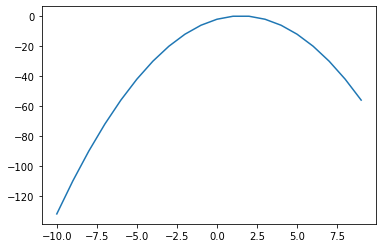

In [52]:
import matplotlib.pyplot as plt

plt.plot(x, f(x))
plt.show()

As you can see, we can use the `pyplot` library to easily create the plot of a nonlinear curve.

---

## Predicting Values with Linear Regression

Suppose we are interested in the `y` value belonging to the `x` coordinate `20`. Based on the linear regression model, all we need to do is substitute the value of `20` in the place of `x` on the previously used code:

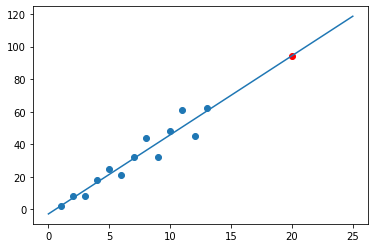

In [55]:
x = np.array(range(1, 14))
y = np.array([2, 8, 8, 18, 25, 21, 32, 44, 32, 48, 61, 45, 62])

a, b = np.polyfit(x, y, 1)

# Plotting the points
plt.scatter(x, y)

# plot the prediction belonging to x = 20
plt.scatter(20, a * 20 + b, color='red')

# plotting the line
plt.plot([0, 25], [b, 25 * a + b])

plt.show()

Here, we denoted the predicted value with red. This red point is on the best line of fit.

---

# Linear Regression with Multiple Variables

In the previous section, we dealt with linear regression with one variable. Now we will learn an extended version of linear regression, where we will use multiple input variables to predict the output.

## Multiple Linear Regression

If you recall the formula for the line of best fit in linear regression, it was defined as $y = a * x + b$, where $a$ is the slope of the line, $b$ is the y intercept of the line, x is the feature value, and y is the calculated label value.

In multiple regression, we have multiple features and one label. If we have three features, $x_1$, $x_2$, and $x_3$, our model changes to $y = a_1 * x_1 + a_2 * x_2 + a_3 * x_3 + b$.

In NumPy array format, we can write this equation as follows:

```Python
y = np.dot(np.array([a1, a2, a3]), np.array([x1, x2, x3]))
```

For convenience, it makes sense to define the whole equation in a vector multiplication format. The coefficient of $b$ is going to be `1`:

```Python
y = np.dot(np.array([b, a1, a2, a3]) * np.array([1, x1, x2, x3]))
```

Multiple linear regression is a simple scalar product of two vectors, where the coefficients $b$, $a_1$, $a_2$ and $a_3$ determine the best fit equation in a four-dimensional space.

To understand the formula of multiple linear regression, you will need the scalar product of two vectors. As the other name for a scalar product is a dot product, the NumPy function performing this operation is called `dot`:

In [57]:
import numpy as np

v1 = [1, 2, 3]
v2 = [4, 5, 6]

np.dot(v1, v2)

32

The output will be $32$ as `np.dot(v1, v2)= 1 * 4 + 2 * 5 + 3 * 6 = 32`.

We simply sum the product of each respective coordinate.

We can determine these coefficients by minimizing the error between the data points and the nearest points described by the equation. For simplicity, we will omit the mathematical solution of the best-fit equation and use scikit-learn instead.

   > **Note** 
   > In n-dimensional spaces, where n is greater than 3, the number of dimensions determines the different variables that are in our model. In the preceding example, we have three features ($x_1$, $x_2$, and $x_3$) and one label, y. This yields four dimensions. If you want to imagine a four-dimensional space, you can imagine a three-dimensional space with a fourth dimension of time. A five-dimensional space can be imagined as a four-dimensional space, where each point in time has a temperature. Dimensions are just features (and labels); they do not necessarily correlate with our concept of three-dimensional space.

### The Process of Linear Regression

We will follow the following simple steps to solve linear regression problems:

  1. Load data from the data sources.
  2. Prepare data for prediction. Data is prepared in this (`normalize`, `format`, and `filter`) format.
  3. Compute the parameters of the regression line. Regardless of whether we use linear regression with one variable or with multiple variables, we will follow these steps.
  
### Importing Data from Data Sources
There are multiple libraries that can provide us with access to data sources. As we will be working with stock data, let's cover two examples that are geared toward retrieving financial data: Quandl and Yahoo Finance. Take a look at these important points before moving ahead:

  * Scikit-learn comes with a few datasets that can be used for practicing your skills.
  * [https://www.quandl.com](https://www.quandl.com) provides you with free and paid financial datasets.
  * [https://pandas.pydata.org/](https://pandas.pydata.org/) helps you load any CSV, Excel, JSON, or SQL data.
  * Yahoo Finance provides you with financial datasets.
  
### Loading Stock Prices with Yahoo Finance

The process of loading stock data with Yahoo Finance is straightforward. All you need to do is install the `yfinance` package using the following command in Jupyter Notebook:

```Python
!pip install yfinance
```

We will download a dataset that has an open price, high price, low price, close price, adjusted close price, and volume values of the S&P 500 index starting from 2015 to January 1, 2020. The S&P 500 index is the stock market index that measures the stock performance of 500 large companies listed in the United States:

In [58]:
!pip install yfinance

     |████████████████████████████████| 5.4 MB 168 kB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=dafe096153d56a253796ca013fbdd07aa328d6ec172f819ae3e7bdc2f63f8694
  Stored in directory: /home/sanyo/.cache/pip/wheels/b4/c3/39/9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=a8ab7be09b3ab34e6caa86a667d9c5256982ced34e9b1ef8cf17adf16d8baf72
  Stored in directory: /home/sanyo/.cache/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [59]:
import yfinance as yahoo

spx_data_frame = yahoo.download("^GSPC", "2015-01-01", "2020-01-01")

[*********************100%***********************]  1 of 1 completed


That's all you need to do. The DataFrame containing the S&P 500 index is ready.

You can plot the index closing prices using the `plot` method:

<AxesSubplot:xlabel='Date'>

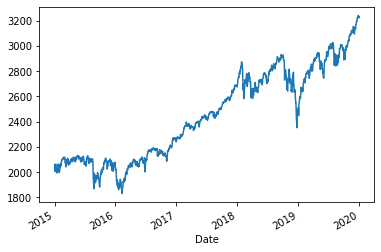

In [60]:
spx_data_frame.Close.plot()

The data does not appear to be linear; a polynomial regression might be a better model for this dataset.

It is also possible to save data to a CSV file using the following code:

In [61]:
spx_data_frame.to_csv("data/yahoo_spx.csv")

**Got to Exercise 2.02**

### Preparing Data for Prediction

Before we perform multiple linear regression on our dataset, we must choose the relevant features and the data range on which we will perform the regression.

Preparing the data for prediction is the second step in the regression process. This step also has several sub-steps. We will go through these sub-steps in the following exercise.

**Go to Exercise 2.03**

---

## Performing and Validating Linear Regression

Now that our data has been prepared, we can perform our linear regression. After that, we will measure our model performance and see how well it performs.

We can now create the linear regression model based on the training data:

In [43]:
import pandas as pd
from sklearn import linear_model

df_features_train = pd.read_csv("data/YALE_SPCOMP_train.csv", index_col=0)
df_features_test = pd.read_csv("data/YALE_SPCOMP_test.csv", index_col=0)

In [46]:
label_train = df_features_train['Real Price Label'].values
features_train = df_features_train[['Scaled Long Interest Rate', 'Scaled Real Price', 'Scaled Real Dividend']].values

label_test = df_features_test['Real Price Label'].values
features_test = df_features_test[['Scaled Long Interest Rate', 'Scaled Real Price', 'Scaled Real Dividend']].values

In [50]:
print(label_train.shape)
print(features_train.shape)
print(label_test.shape)
print(features_test.shape)

(753,)
(753, 3)
(84,)
(84, 3)


In [54]:
model = linear_model.LinearRegression()
model.fit(features_train, label_train)

TypeError: __init__() got an unexpected keyword argument 'random_state'

Once the model is ready, we can use it to predict the labels belonging to the test feature values and use the `score` method from the model to see how accurate it is:

In [52]:
label_predicted = model.predict(features_test)
model.score(features_test, label_test)

0.9847533977733427

With a score or $R^2$ of $>0.985$, we can conclude that the model is very accurate. This is not a surprise since the financial market grows at around 6-7% a year. This is linear growth, and the model essentially predicts that the markets will continue growing at a linear rate. Concluding that markets tend to increase in the long run is not rocket science.

## Predicting the Future

Now that our model has been trained, we can use it to predict future values. We will use the `scaled_features_latest_3` variable that we created by taking the last three values of the features NumPy array and using it to predict the index price of the next three months in the following code:

In [53]:
import numpy as np

scaled_features_latest_3 = np.array([[-1.38861121, 2.97929738, 3.57121717],
                                    [-1.38861121, 2.83538088, 3.61285159],
                                    [-1.36423669, 2.95570629, 3.64931605]])
label_predicted = model.predict(scaled_features_latest_3)
print(label_predicted)

[3109.77708526 3013.56686493 3095.87893954]


By looking at the output, you might think it seems easy to forecast the value of the S&P 500 and use it to earn money by investing in it. Unfortunately, in practice, using this model for making money by betting on the forecast is by no means better than gambling in a casino. This is just an example to illustrate prediction; it is not enough to be used for short-term or long-term speculation on market prices. In addition to this, stock prices are sensitive to many external factors, such as economic recession and government policy. This means that past patterns do not necessarily reflect any patterns in the future.

---

# Polynomial and Support Vector Regression

When performing a polynomial regression, the relationship between x and y, or using their other names, features, and labels, is not a linear equation, but a polynomial equation. This means that instead of the $y = a * x + b$ equation, we can have multiple coefficients and multiple powers of $x$ in the equation.

To make matters even more complicated, we can perform polynomial regression using multiple variables, where each feature may have coefficients multiplying different powers of the feature.

Our task is to find a curve that best fits our dataset. Once polynomial regression is extended to multiple variables, we will learn the SVM model to perform polynomial regression.

## Polynomial Regression with One Variable

As a recap, we have performed two types of regression so far:

  * Simple linear regression: $y = a * x + b$
  * Multiple linear regression: $y = b + a_1 * x_1 + a_2 * x_2 + \dots + a_n * x_n$
  
We will now learn how to do polynomial linear regression with one variable. The equation for polynomial linear regression is $y = b + a_1 * x + a_2 * (x)^2 + a_3 * (x)^3 + \dots + a_n * (x)^n$

Polynomial linear regression has a vector of coefficients, $(b, a_1, a_2, \dots, a_n)$, multiplying a vector of degrees of $x$ in the polynomial, $(1, x^1, x^2, \dots , x^n)$.

At times, polynomial regression works better than linear regression. If the relationship between labels and features can be described using a linear equation, then using a linear equation makes perfect sense. If we have a nonlinear growth, polynomial regression tends to approximate the relationship between features and labels better.

The simplest implementation of linear regression with one variable was the `polyfit` method of the NumPy library. In the next exercise, we will perform multiple polynomial linear regression with degrees of 2 and 3.

  > **Note**  
  > Even though our polynomial regression has an equation containing coefficients of xn, this equation is still referred to as polynomial linear regression in literature. Regression is made linear not because we restrict the usage of higher powers of x in the equation, but because the coefficients a1,a2 … and so on are linear in the equation. This means that we use the toolset of linear algebra and work with matrices and vectors to find the missing coefficients that minimize the error of the approximation.
  
**Go to Exercise 2.04**

If you research Binet's formula, you will find out that the Fibonacci function is an exponential function, as the $n^{th}$ Fibonacci number is calculated as the $n^{th}$ power of a constant. Therefore, the higher the polynomial degree we use, the more accurate our approximation will be.

## Polynomial Regression with Multiple Variables

When we have one variable of degree n, we have n+1 coefficients in the equation as $y = b + a_1 * x + a_2 * (x)^2 + a_3 * (x)^3 + \dots + a_n * (x)^n$.

Once we deal with multiple features, $x_1, x_2, \cdot, x_m$, and their powers of up to the $n^{th}$ degree, we get an $m * (n+1)$ matrix of coefficients. The math will become quite lengthy when we start exploring the details and prove how a polynomial model works. We will also lose the nice visualizations of two-dimensional curves.

Therefore, we will apply the concepts learned in the previous section on polynomial regression with one variable and omit the math. When training and testing a linear regression model, we can calculate the mean square error to see how good an approximation a model is.

In scikit-learn, the degree of the polynomials used in the approximation is a simple parameter in the model.

As polynomial regression is a form of linear regression, we can perform polynomial regression without changing the regression model. All we need to do is to transform the input and keep the linear regression model. The transformation of the input is performed by the `fit_transform` method of the `PolynomialFeatures` package.

First, we can reuse the code from Exercise 2.03 and import `PolynomialFeatures` from the `preprocessing` module of `sklearn`:

In [59]:
import quandl
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

quandl.ApiConfig.api_key = "6kRfVHexH6wxY9PPLGsG"

data_frame = quandl.get("YALE/SPCOMP", start_date="1950-01-01", end_date="2019-12-31")
data_frame = data_frame[['Long Interest Rate', 'Real Price', 'Real Dividend']]
data_frame.fillna(method='ffill', inplace=True)
data_frame['Real Price Label'] = data_frame['Real Price'].shift(-3)
features = np.array(data_frame.drop('Real Price Label', 1))
scaled_features = preprocessing.scale(features)
scaled_features_latest_3 = scaled_features[-3:]
scaled_features = scaled_features[:-3]
data_frame.dropna(inplace=True)
label = np.array(data_frame['Real Price Label'])

Now, we can create a polynomial regression of degree 3 using the `fit_transform` method of `PolynomialFeatures`:

In [60]:
poly_regressor = PolynomialFeatures(degree=3)
poly_scaled_features = poly_regressor.fit_transform(scaled_features)
poly_scaled_features

array([[ 1.        , -1.14834808, -1.13030753, ..., -1.52219501,
        -1.60454063, -1.69134088],
       [ 1.        , -1.14109376, -1.12504171, ..., -1.49305375,
        -1.56547095, -1.64140058],
       [ 1.        , -1.13383944, -1.12398084, ..., -1.48269439,
        -1.54819824, -1.61659598],
       ...,
       [ 1.        , -1.38861121,  2.97929738, ..., 31.69888394,
        37.99674356, 45.5458471 ],
       [ 1.        , -1.38861121,  2.83538088, ..., 29.04510391,
        37.00936633, 47.15745554],
       [ 1.        , -1.36423669,  2.95570629, ..., 31.88115373,
        39.36264113, 48.5997944 ]])

Then, we need to split the data into testing and training sets:

In [61]:
(poly_features_train, poly_features_test, poly_label_train, poly_label_test) = model_selection.train_test_split(poly_scaled_features,
                                                                                                               label,
                                                                                                               test_size=0.1,
                                                                                                               random_state=8)

The `train_test_split` function shuffles the lines of our data, keeps the correspondence, and puts approximately 10% of all data in the test variables, keeping 90% for the training variables. We also use `random_state=8` in order to reproduce the results.

Our data is now ready to be used for the multiple polynomial regression model; we will also measure its performance with the `score` function:

In [62]:
model = linear_model.LinearRegression()
model.fit(poly_features_train, poly_label_train)
model.score(poly_features_test, poly_label_test)

0.9879690504907223

With a score or $R^2$ of $0.987$, our multiple polynomial regression model is slightly better than our multiple linear regression model $(0.985)$, which we built in Exercise 2.03. It might be possible that both models are overfitting the dataset.

---

## Support Vector Regression

SVMs are binary classifiers and are usually used in classification problems (you will learn more later). An SVM classifier takes data and tries to predict which class it belongs to. Once the classification of a data point is determined, it gets labeled. But SVMs can also be used for regression; that is, instead of labeling data, it can predict future values in a series.

The SVR model uses the space between our data as a margin of error. Based on the margin of error, it makes predictions regarding future values.

If the margin of error is too small, we risk overfitting the existing dataset. If the margin of error is too big, we risk underfitting the existing dataset.

In the case of a classifier, the kernel describes the surface dividing the state space, whereas, in a regression, the kernel measures the margin of error. This kernel can use a linear model, a polynomial model, or many other possible models. The default kernel is **RBF**, which stands for **Radial Basis Function**.

SVR is an advanced topic that is outside the scope of this book. Therefore, we will only stick to an easy walk-through as an opportunity to try out another regression model on our data.

We can reuse the code from Exercise 2.03,up to Step 11:

In [63]:
import quandl
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

quandl.ApiConfig.api_key = "6kRfVHexH6wxY9PPLGsG"

data_frame = quandl.get("YALE/SPCOMP", start_date="1950-01-01", end_date="2019-12-31")
data_frame = data_frame[['Long Interest Rate', 'Real Price', 'Real Dividend']]
data_frame.fillna(method='ffill', inplace=True)
data_frame['Real Price Label'] = data_frame['Real Price'].shift(-3)
features = np.array(data_frame.drop('Real Price Label', 1))
scaled_features = preprocessing.scale(features)
scaled_features_latest_3 = scaled_features[-3:]
scaled_features = scaled_features[:-3]
data_frame.dropna(inplace=True)
label = np.array(data_frame['Real Price Label'])
(features_train, features_test, label_train, label_test) = model_selection.train_test_split(scaled_features, label, test_size=0.1, random_state=8)

Then, we can perform a regression with `svm` by simply changing the linear model to a support vector model by using the `svm` method from `sklearn`:

In [64]:
from sklearn import svm

model = svm.SVR()
model.fit(features_train, label_train)

SVR()

As you can see, performing an SVR is exactly the same as performing a linear regression, with the exception of defining the model as `svm.SVR()`.

Finally, we can predict and measure the performance of our model:

In [65]:
label_predicted = model.predict(features_test)
model.score(features_test, label_test)

0.02899197278597132

As you can see, the score or $R^2$ is quite low, our SVR's parameters need to be optimized in order to increase the accuracy of the model.

## Support Vector Machines with a 3-Degree Polynomial Kernel

Let's switch the kernel of the SVM to a polynomial function (the default degree is `3`) and measure the performance of the new model:

In [66]:
model = svm.SVR(kernel='poly')
model.fit(features_train, label_train)
label_predicted = model.predict(features_test)
model.score(features_test, label_test)

0.44430077658714306

We managed to increase the performance of the SVM by simply changing the kernel function to a polynomial function; however, the model still needs a lot of tuning to reach the same performance as the linear regression models.